<a href="https://colab.research.google.com/github/felipesayegg/Machine-Learning/blob/main/Regress%C3%A3o_Linear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1. Entendimento do problema

Muitos fatores que afetam quanto você paga pelo seguro saúde não estão sob seu controle. No entanto, é bom entender o que são esses fatores. Aqui estão alguns fatores que afetam quanto custam os seguro saúde

* idade: idade do beneficiário principal
* sexo: sexo do contratante de seguros, feminino, masculino
* imc: Índice de massa corporal, fornecendo uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m ^ 2) usando a relação entre altura e peso, idealmente 18,5 a 24,9
* filhos: Número de filhos cobertos por seguro saúde / Número de dependentes
* fumante: Fumar
* região: a área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste



In [33]:
pip install pandas #  é usado para instalar a biblioteca Pandas, que é uma das bibliotecas mais populares no Python para manipulação e análise de dados.

In [34]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd # O comando import pandas as pd é utilizado para importar a biblioteca Pandas no seu código Python e atribuir a ela o alias pd
import matplotlib.pyplot as plt # O comando import matplotlib.pyplot as plt é utilizado para importar a biblioteca Matplotlib no seu código Python e atribuir a ela o alias plt.
import seaborn as sns # O comando import seaborn as sns é utilizado para importar a biblioteca Seaborn no seu código Python e atribuir a ela o alias sns
import numpy as np # O comando import numpy as np é utilizado para importar a biblioteca NumPy no seu código Python e atribuir a ela o alias np.

In [35]:
df = pd.read_csv("/content/insurance (1).csv")   # Essa linha criou a variavel df de dataframe e chamou uma função do pand para ler o arquivo csv e transformar em dataframe.

In [36]:
df.head() # Essa linha mostra as 5 primeiras linhas do dataframe, lembrando que df é a variavle que contem meu dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.tail() # Essa linha mostra as 5 ultimas linhas do dataframe, lembrando que df é a variavle que contem meu dataframe

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [38]:
df.shape # Essa linha mostra o numero de linhas e colunas do dataframe, lembrando que df é a variavle que contem meu dataframe

(1338, 7)

In [39]:
df.describe() # Essa linha mostra um resumo estatístico do dataframe, lembrando que df é a variavle que contem meu dataframe

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Idade média é de 39 anos, a idade máxima de 64 anos e minima é 18 ano. Em relação aos custos médicos em média os pacientes gastam 13270 por ano com médicos.

In [40]:
df.info() # Essa linha mostra informações do dataframe, lembrando que df é a variavle que contem meu dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
x = df[["bmi"]] # esta salvando o bmi no x, criando um novo datafreme
x

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [42]:
y = df["charges"]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


#Explicação do Código:
##sns.scatterplot:

* Este é o método da biblioteca Seaborn que cria um gráfico de dispersão. O Seaborn é uma biblioteca de visualização de dados em Python que se baseia no Matplotlib e fornece uma interface mais amigável e estética para criar gráficos complexos.
x='bmi':

* Aqui você está especificando que a variável a ser usada no eixo x (horizontal) do gráfico é bmi (Índice de Massa Corporal). Isso significa que os valores de BMI de cada entrada no DataFrame df serão plotados ao longo do eixo horizontal.
y='charges':

* Este argumento indica que a variável a ser usada no eixo y (vertical) é charges. Os valores da coluna charges do DataFrame serão plotados ao longo do eixo vertical.
hue='smoker':

* O parâmetro hue permite que você diferencie os pontos no gráfico com base em outra variável. Neste caso, a variável smoker é usada para colorir os pontos do gráfico de acordo com se a pessoa é fumante ou não. Geralmente, isso resulta em diferentes cores para fumantes e não fumantes, permitindo uma visualização mais clara das tendências.
data=df:

* Este argumento especifica qual DataFrame está sendo utilizado para obter os dados. Aqui, você está usando o DataFrame df que já foi carregado anteriormente.

<Axes: xlabel='bmi', ylabel='charges'>

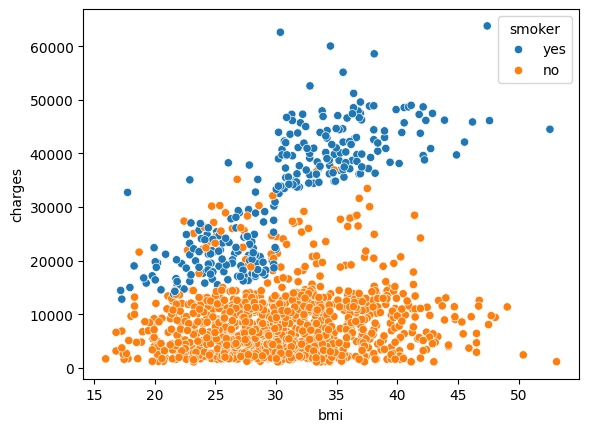

In [43]:
sns.scatterplot(x ="bmi", y = "charges", hue = "smoker", data = df)

# 4 - Ajuste da Regressão Linear

# Explicação do Comando:
## from sklearn.linear_model:

* Essa parte do comando indica que você está importando um módulo específico da biblioteca scikit-learn, que é uma das bibliotecas mais populares em Python para machine learning e análise de dados.
O submódulo linear_model contém implementações de diferentes algoritmos de regressão linear.
import LinearRegression:

** Aqui, você está importando a classe LinearRegression, que é uma implementação do algoritmo de regressão linear.
Essa classe pode ser usada para criar um modelo de regressão linear que permite prever um valor contínuo (como charges, por exemplo) com base em uma ou mais variáveis independentes (como bmi, idade, etc.).

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
reg = LinearRegression() # é utilizada para criar uma instância do modelo de regressão linear a partir da classe LinearRegression que você importou da biblioteca scikit-learn

In [46]:
reg.fit(x , y)  # ensinando a regressão linear para o programa comparando a varialvel charge com bmi

LinearRegression()

In [47]:
y_hat = reg.predict(x)

In [48]:
y_hat

array([12181.99476821, 14494.02945899, 14190.74722528, ...,
       15707.15839385, 11354.86140353, 12642.82621424])

In [54]:
novo_bmi = pd.DataFrame({'bmi': [25]})

In [57]:
novo_bmi

,bmi
0,25


In [56]:
y_hat = reg.predict(novo_bmi)
y_hat

array([11039.7629789])

In [59]:
b = reg.intercept_ # intercepta a regressão
b

1192.9372089611497

In [60]:
b1 = reg.coef_ # coeficiente da regressão
b1

array([393.8730308])